In [17]:
#for comparing the full-depth and single-depth goods classifications

%pylab inline
from astropy.io import fits as pyfits
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.io import fits
from astropy.table import Table,Column
import scipy.stats.distributions as dist

import os
import warnings
import requests

mpl.rcParams['text.usetex']=True
mpl.rcParams['axes.linewidth'] = 3

warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=UserWarning, append=True);



Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
gdata=Table.read('/data/lucifer1.1/users/galloway/GZHUBBLE/goods_depths_analysis/goods_norm_1_full_2.fits')

In [43]:
p_features_norm_weighted='t01_smooth_or_features_a02_features_or_disk_weighted_fraction_2'
p_features_full_weighted='t01_smooth_or_features_a02_features_or_disk_weighted_fraction_1'
p_features_norm_debiased='t01_smooth_or_features_a02_features_or_disk_debiased_fraction_2'
p_features_full_debiased='t01_smooth_or_features_a02_features_or_disk_debiased_fraction_1'
p_features_norm_best='t01_smooth_or_features_a02_features_or_disk_best_fraction_2'
p_features_full_best='t01_smooth_or_features_a02_features_or_disk_best_fraction_1'

In [34]:
features_weighted_hist,xedges,yedges=np.histogram2d(gdata[p_features_norm_weighted],gdata[p_features_full_weighted],range=((0,1),(0,1)))
extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]]


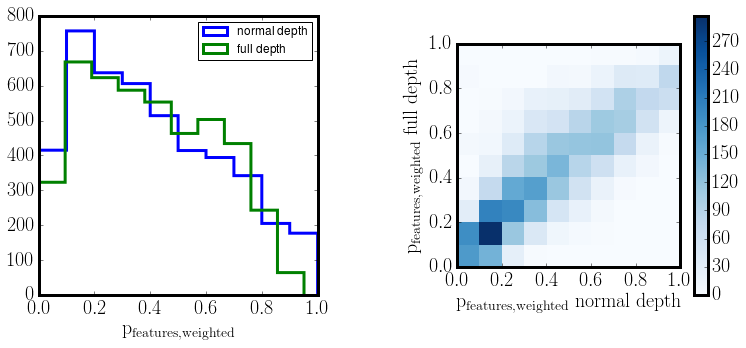

In [35]:
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20 

f=plt.figure(figsize=(20,5))
cmap=cm.Blues
gs=gridspec.GridSpec(1,3)
gs.update(wspace=.5)
ax1 = plt.subplot(gs[0,0])
plt.hist(gdata[p_features_norm_weighted],histtype='step',label='normal depth',lw=3)
plt.hist(gdata[p_features_full_weighted],histtype='step',label='full depth',lw=3)
plt.xlabel('$\mathrm{p_{features,weighted}}$',fontsize=20)
plt.legend()

ax2 = plt.subplot(gs[0,1])
plt.imshow(features_weighted_hist.T,origin='lower',extent=extent,interpolation='nearest',cmap=cmap)
plt.xlabel('$\mathrm{p_{features,weighted}~normal~depth}$',fontsize=20)
plt.ylabel(r'$\mathrm{p_{features,weighted}~full~depth}$',fontsize=20)
plt.colorbar()


In [40]:
features_debiased_hist,xedges,yedges=np.histogram2d(gdata[p_features_norm_debiased],gdata[p_features_full_debiased],range=((0,1),(0,1)))
extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]]


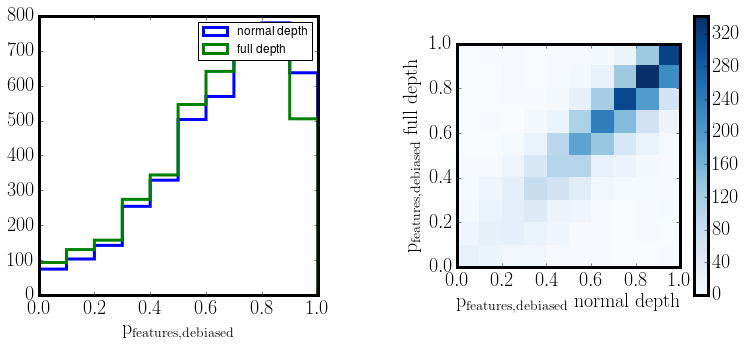

In [41]:
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20 

f=plt.figure(figsize=(20,5))
cmap=cm.Blues
gs=gridspec.GridSpec(1,3)
gs.update(wspace=.5)
ax1 = plt.subplot(gs[0,0])
plt.hist(gdata[p_features_norm_debiased],histtype='step',label='normal depth',lw=3,range=(0,1))
plt.hist(gdata[p_features_full_debiased],histtype='step',label='full depth',lw=3,range=(0,1))
plt.xlabel('$\mathrm{p_{features,debiased}}$',fontsize=20)
plt.legend()

ax2 = plt.subplot(gs[0,1])
plt.imshow(features_debiased_hist.T,origin='lower',extent=extent,interpolation='nearest',cmap=cmap)
plt.xlabel('$\mathrm{p_{features,debiased}~normal~depth}$',fontsize=20)
plt.ylabel(r'$\mathrm{p_{features,debiased}~full~depth}$',fontsize=20)
plt.colorbar()

In [44]:
features_best_hist,xedges,yedges=np.histogram2d(gdata[p_features_norm_best],gdata[p_features_full_best],range=((0,1),(0,1)))
extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]]


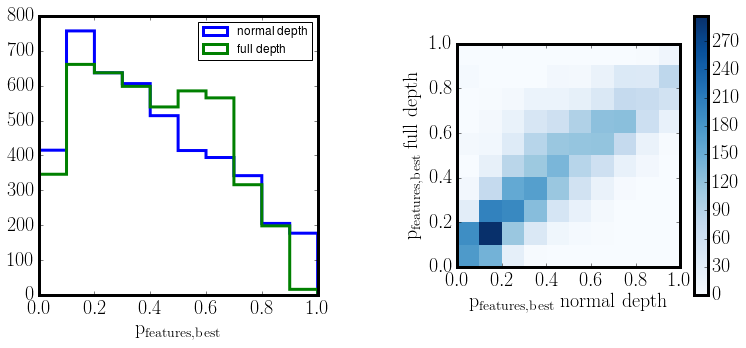

In [45]:
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20 

f=plt.figure(figsize=(20,5))
cmap=cm.Blues
gs=gridspec.GridSpec(1,3)
gs.update(wspace=.5)
ax1 = plt.subplot(gs[0,0])
plt.hist(gdata[p_features_norm_best],histtype='step',label='normal depth',lw=3,range=(0,1))
plt.hist(gdata[p_features_full_best],histtype='step',label='full depth',lw=3,range=(0,1))
plt.xlabel('$\mathrm{p_{features,best}}$',fontsize=20)
plt.legend()

ax2 = plt.subplot(gs[0,1])
plt.imshow(features_best_hist.T,origin='lower',extent=extent,interpolation='nearest',cmap=cmap)
plt.xlabel('$\mathrm{p_{features,best}~normal~depth}$',fontsize=20)
plt.ylabel(r'$\mathrm{p_{features,best}~full~depth}$',fontsize=20)
plt.colorbar()

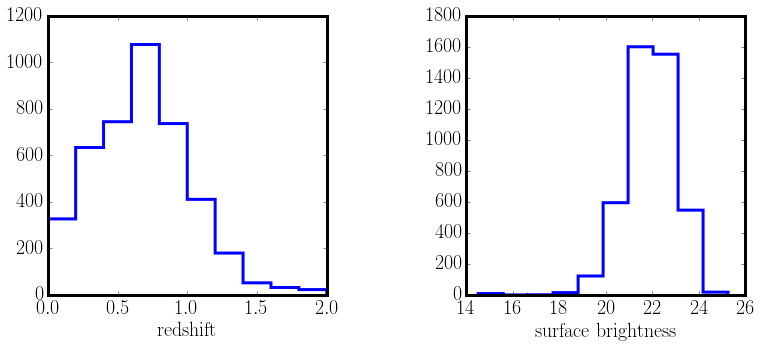

In [42]:
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20 

f=plt.figure(figsize=(20,5))
cmap=cm.Blues
gs=gridspec.GridSpec(1,3)
gs.update(wspace=.5)
ax1 = plt.subplot(gs[0,0])
plt.hist(gdata['Z_BEST_1'],histtype='step',lw=3,range=(0,2))
plt.xlabel('$\mathrm{redshift}$',fontsize=20)

ax2 = plt.subplot(gs[0,1])
plt.hist(gdata['MU_HI_1'],histtype='step',lw=3)
plt.xlabel('$\mathrm{surface~brightness}$',fontsize=20)
